# GDT-TS scores tests

In [1]:
import numpy as np
import scipy
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
import seaborn
from sklearn import preprocessing
from sklearn.externals import joblib

%matplotlib inline
%load_ext autoreload
%autoreload 2

from data_mining import load_pickled_dataset, dataset_binary_filename, select_subset

### Bugs

In [2]:
scores = load_pickled_dataset(dataset_binary_filename('*solvation-b3-a2-c15--skip_errors.mat',
                                                      '8269eab4b9ebaa69aa1467308c48ed4f',
                                                      'binaries'))[1]
scores = select_subset(scores, scores, '^.*$')[1]
indices = scores.index.sort_values().copy()
scores.describe()

RMSD       TM-score   MaxSub-score   GDT-TS-score  \
count  208696.000000  208696.000000  208696.000000  208696.000000   
mean       11.752208       0.524391       0.414203       0.454818   
std        14.253259       0.270520       0.267433       0.256058   
min         0.000000       0.002600       0.002600       0.002600   
25%         3.932000       0.246500       0.157700       0.214500   
50%         9.104000       0.537900       0.390300       0.448900   
75%        16.305000       0.776500       0.649200       0.677400   
max       539.475000       1.000000       1.000000       1.000000   

        GDT-HA-score  RMSD-backwards  TM-score-backwards  \
count  208696.000000   208696.000000       208696.000000   
mean        0.322878       11.752208            0.513798   
std         0.209488       14.253259            0.257803   
min         0.002600        0.000000            0.009700   
25%         0.135100        3.932000            0.246700   
50%         0.294700        9.104000            0.533100   
75%         0.480700       16.305000            0.751500   
max         1.000000      539.475000            1.000000   

       MaxSub-score-backwards  GDT-TS-score-backwards  GDT-HA-score-backwards  
count           208696.000000           208696.000000           208696.000000  
mean                 0.403853                0.444175                0.315035  
std                  0.253616                0.241718                0.198125  
min                  0.005700                0.009700                0.005000  
25%                  0.161400                0.218400                0.138700  
50%                  0.384450                0.440200                0.290900  
75%                  0.627300                0.653600                0.465700  
max                  1.000000                1.000000                1.000000

In [25]:
sets = np.array([x.split('/')[-3] for x in scores.index])

In [82]:
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=15)
plt.rc('grid', color='k')
plt.rc('grid', linestyle='--')
plt.rc('grid', linewidth=0.2)

In [12]:
seaborn.set_style("whitegrid")
seaborn.set_context("paper")
seaborn.reset_orig()

In [76]:
scores.RMSD.min()

0.0

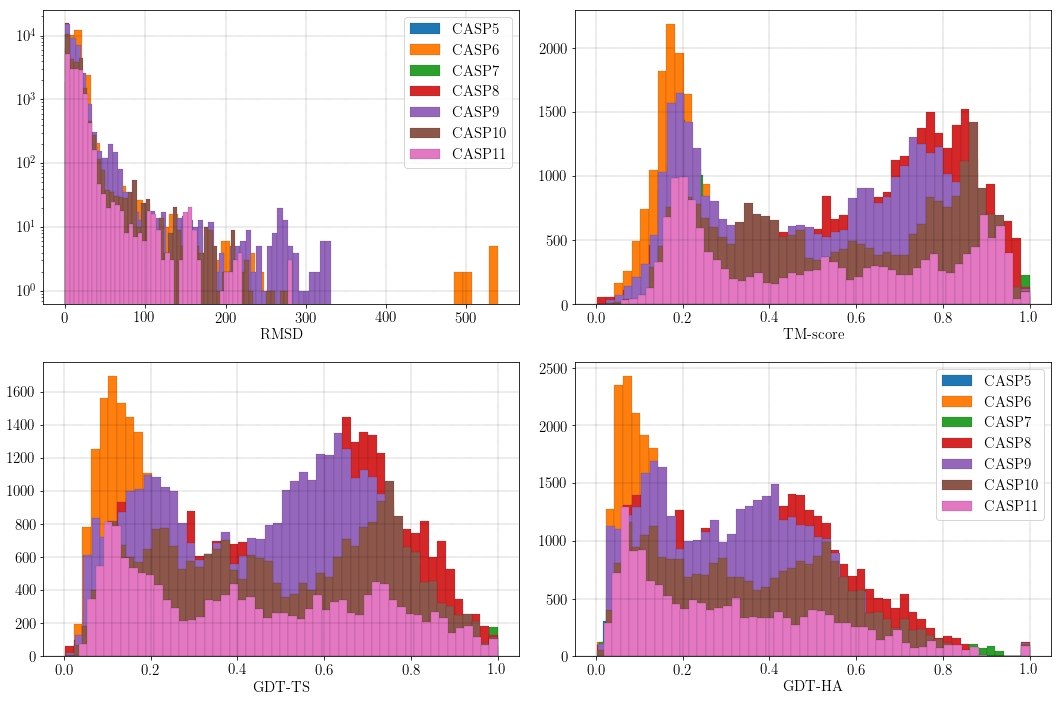

In [84]:
num_bins = 50

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for s in ['CASP' + str(i) for i in range(5, 12)]:
    ax[0, 0].hist(scores[sets == s]['RMSD'], bins=num_bins, label=s, edgecolor='black', linewidth=.1)
    ax[0, 1].hist(scores[sets == s]['TM-score'], bins=num_bins, label=s, edgecolor='black', linewidth=.1)
    ax[1, 0].hist(scores[sets == s]['GDT-TS-score'], bins=num_bins, label=s, edgecolor='black', linewidth=.1)
    ax[1, 1].hist(scores[sets == s]['GDT-HA-score'], bins=num_bins, label=s, edgecolor='black', linewidth=.1)

ax[0, 0].set_xlabel('RMSD')
ax[0, 1].set_xlabel('TM-score')
ax[1, 0].set_xlabel('GDT-TS')
ax[1, 1].set_xlabel('GDT-HA')

for axes in ax:
    for a in axes:
        a.grid()

ax[0, 0].set_yscale('log')
ax[0, 0].legend(loc='upper right')
ax[1, 1].legend(loc='upper right')

plt.tight_layout()
plt.savefig('score_distributions.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [5]:
scores[(scores['RMSD'] == 0) & (scores['GDT-TS-score'] != 1)].head()

RMSD  TM-score  \
../../datasets/CASP/data/CASP10/T0653/3D-JIGSAW...   0.0    0.0026   
../../datasets/CASP/data/CASP10/T0653/3D-JIGSAW...   0.0    0.0026   
../../datasets/CASP/data/CASP10/T0653/3D-JIGSAW...   0.0    0.0026   
../../datasets/CASP/data/CASP10Stage2/T0653/3D-...   0.0    0.0026   
../../datasets/CASP/data/CASP10Stage2/T0653/3D-...   0.0    0.0026   

                                                    MaxSub-score  \
../../datasets/CASP/data/CASP10/T0653/3D-JIGSAW...        0.0026   
../../datasets/CASP/data/CASP10/T0653/3D-JIGSAW...        0.0026   
../../datasets/CASP/data/CASP10/T0653/3D-JIGSAW...        0.0026   
../../datasets/CASP/data/CASP10Stage2/T0653/3D-...        0.0026   
../../datasets/CASP/data/CASP10Stage2/T0653/3D-...        0.0026   

                                                    GDT-TS-score  \
../../datasets/CASP/data/CASP10/T0653/3D-JIGSAW...        0.0026   
../../datasets/CASP/data/CASP10/T0653/3D-JIGSAW...        0.0026   
../../datasets/CASP/data/CASP10/T0653/3D-JIGSAW...        0.0026   
../../datasets/CASP/data/CASP10Stage2/T0653/3D-...        0.0026   
../../datasets/CASP/data/CASP10Stage2/T0653/3D-...        0.0026   

                                                    GDT-HA-score  \
../../datasets/CASP/data/CASP10/T0653/3D-JIGSAW...        0.0026   
../../datasets/CASP/data/CASP10/T0653/3D-JIGSAW...        0.0026   
../../datasets/CASP/data/CASP10/T0653/3D-JIGSAW...        0.0026   
../../datasets/CASP/data/CASP10Stage2/T0653/3D-...        0.0026   
../../datasets/CASP/data/CASP10Stage2/T0653/3D-...        0.0026   

                                                    RMSD-backwards  \
../../datasets/CASP/data/CASP10/T0653/3D-JIGSAW...             0.0   
../../datasets/CASP/data/CASP10/T0653/3D-JIGSAW...             0.0   
../../datasets/CASP/data/CASP10/T0653/3D-JIGSAW...             0.0   
../../datasets/CASP/data/CASP10Stage2/T0653/3D-...             0.0   
../../datasets/CASP/data/CASP10Stage2/T0653/3D-...             0.0   

                                                    TM-score-backwards  \
../../datasets/CASP/data/CASP10/T0653/3D-JIGSAW...                 1.0   
../../datasets/CASP/data/CASP10/T0653/3D-JIGSAW...                 1.0   
../../datasets/CASP/data/CASP10/T0653/3D-JIGSAW...                 1.0   
../../datasets/CASP/data/CASP10Stage2/T0653/3D-...                 1.0   
../../datasets/CASP/data/CASP10Stage2/T0653/3D-...                 1.0   

                                                    MaxSub-score-backwards  \
../../datasets/CASP/data/CASP10/T0653/3D-JIGSAW...                     1.0   
../../datasets/CASP/data/CASP10/T0653/3D-JIGSAW...                     1.0   
../../datasets/CASP/data/CASP10/T0653/3D-JIGSAW...                     1.0   
../../datasets/CASP/data/CASP10Stage2/T0653/3D-...                     1.0   
../../datasets/CASP/data/CASP10Stage2/T0653/3D-...                     1.0   

                                                    GDT-TS-score-backwards  \
../../datasets/CASP/data/CASP10/T0653/3D-JIGSAW...                     1.0   
../../datasets/CASP/data/CASP10/T0653/3D-JIGSAW...                     1.0   
../../datasets/CASP/data/CASP10/T0653/3D-JIGSAW...                     1.0   
../../datasets/CASP/data/CASP10Stage2/T0653/3D-...                     1.0   
../../datasets/CASP/data/CASP10Stage2/T0653/3D-...                     1.0   

                                                    GDT-HA-score-backwards  
../../datasets/CASP/data/CASP10/T0653/3D-JIGSAW...                     1.0  
../../datasets/CASP/data/CASP10/T0653/3D-JIGSAW...                     1.0  
../../datasets/CASP/data/CASP10/T0653/3D-JIGSAW...                     1.0  
../../datasets/CASP/data/CASP10Stage2/T0653/3D-...                     1.0  
../../datasets/CASP/data/CASP10Stage2/T0653/3D-...                     1.0

In [6]:
plt.rc('font', family='serif')#, serif='Times')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=12)
plt.rc('legend', fontsize=10)
#plt.rcParams['mathtext.fontset'] = 'stix'
#plt.rcParams['font.family'] = 'STIXGeneral'
params = {
'text.usetex': True,
#'font.size': 15,
'text.latex.unicode': True
}
plt.rcParams.update(params)

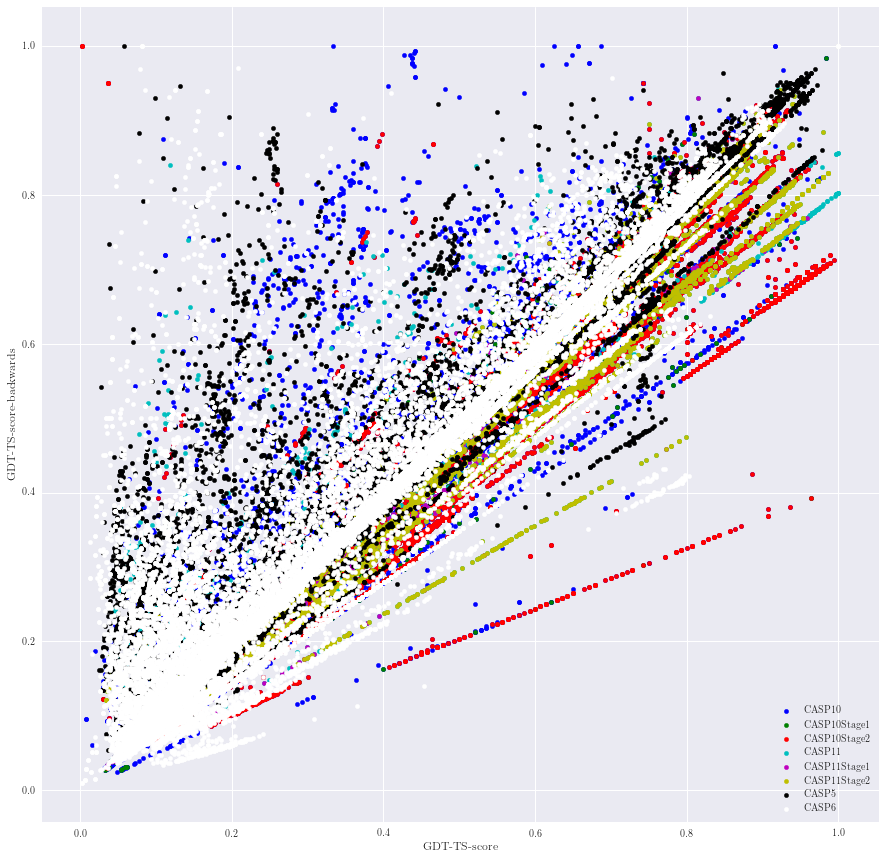

In [7]:
plt.figure(figsize=(15, 15))
ax = plt.subplot(111)
for s, c in zip(np.unique(sets), ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']):
    scores.ix[sets == s, ['GDT-TS-score', 'GDT-TS-score-backwards']].plot(x='GDT-TS-score',
                                                                          y='GDT-TS-score-backwards',
                                                                          kind='scatter',
                                                                          label=s,
                                                                          color=c,
                                                                          ax=ax)
plt.legend(loc='lower right')
plt.show()

In [44]:
x = y = np.linspace(0, 5, 100)
z = set(itertools.product(x.round(0), y.round(0)))
z = {pair: np.random.randint(0, 100) for pair in z}
X, Y = np.meshgrid(x, y)
Z = np.array([z[(round(first), round(second))] for first, second in zip(X.ravel(), Y.ravel())]).reshape(X.shape)

from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

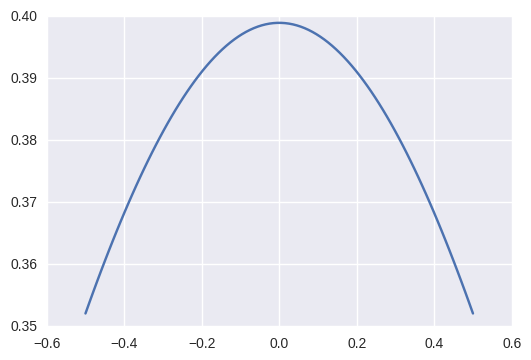

In [83]:
x = np.linspace(-0.5, 0.5, 100)

myclip_a, myclip_b = -0.25, 0.25
my_mean = 0
my_std = 0.01
a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std

plt.plot(x, scipy.stats.truncnorm.pdf(x, a=a, b=b))